In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:

df = pd.read_csv('owid-covid-data.csv')  


In [7]:
# Cell 3: Initial exploration
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (429435, 67)

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [9]:
countries = ['United States', 'India', 'Brazil', 'Kenya', 'United Kingdom', 'Germany']
df_filtered = df[df['location'].isin(countries)].copy()

In [12]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Forward-fill missing values for time-series data
cols_to_fill = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
for col in cols_to_fill:
    df_filtered[col] = df_filtered.groupby('location')[col].ffill()

# Calculate death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Keep only essential columns
keep_cols = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'death_rate', 'population']
df_clean = df_filtered[keep_cols].copy()

In [16]:
df_clean = df_clean.dropna(subset=['total_cases', 'total_deaths'])

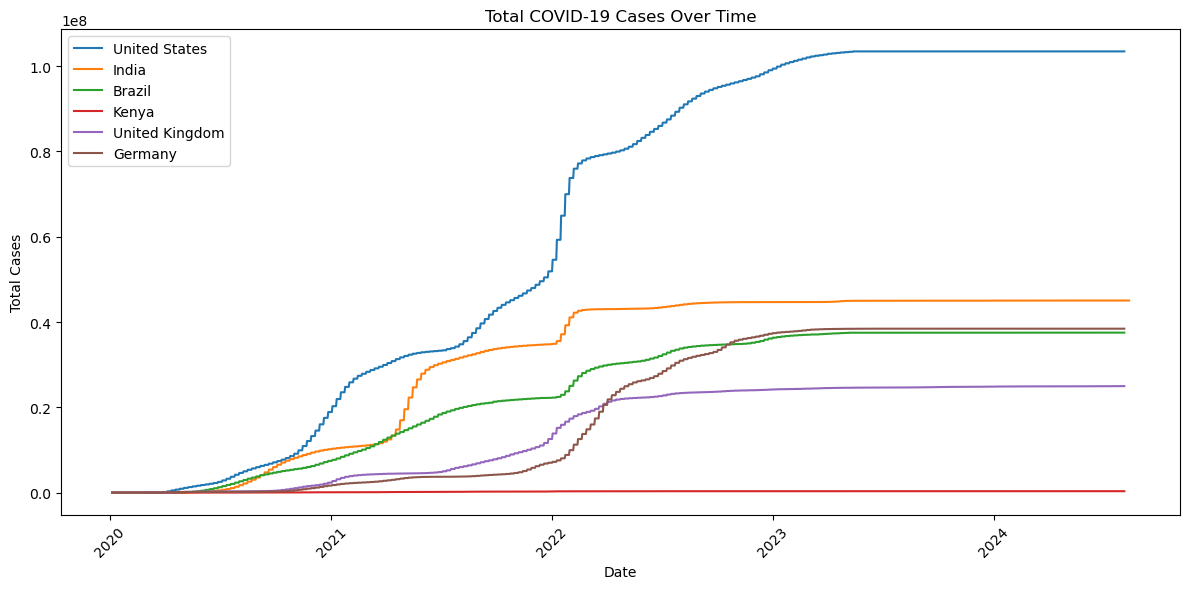

In [18]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

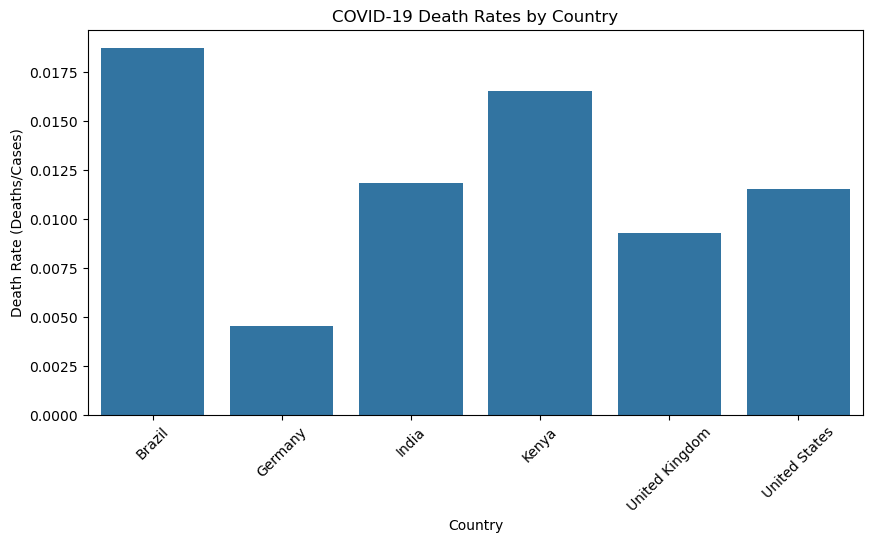

In [21]:
latest_data = df_clean.sort_values('date').groupby('location').last().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=latest_data, x='location', y='death_rate')
plt.title('COVID-19 Death Rates by Country')
plt.xlabel('Country')
plt.ylabel('Death Rate (Deaths/Cases)')
plt.xticks(rotation=45)
plt.show()

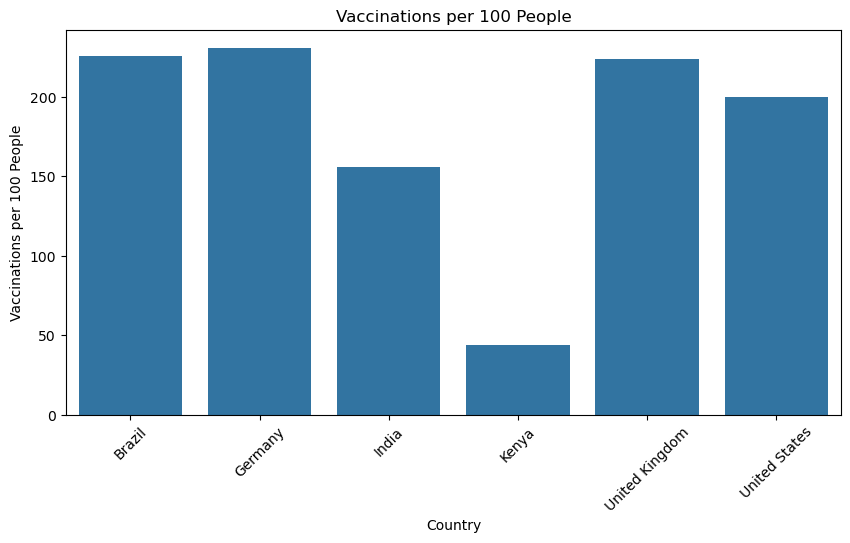

In [23]:
latest_data['vaccinations_per_100'] = (latest_data['total_vaccinations'] / latest_data['population']) * 100

plt.figure(figsize=(10, 5))
sns.barplot(data=latest_data, x='location', y='vaccinations_per_100')
plt.title('Vaccinations per 100 People')
plt.xlabel('Country')
plt.ylabel('Vaccinations per 100 People')
plt.xticks(rotation=45)
plt.show()

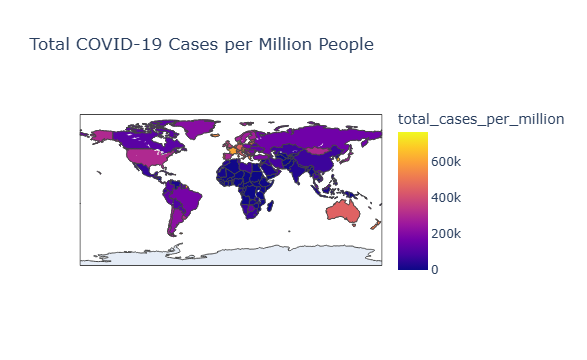

In [25]:
world_latest = df.sort_values('date').groupby('location').last().reset_index()

fig = px.choropleth(world_latest, 
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    hover_data=["total_cases", "total_deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total COVID-19 Cases per Million People")
fig.show()

In [29]:
# COVID-19 Global Trends Analysis Objective: Compare cases, deaths, and vaccination progress across 6 countries (US, India, Brazil, Kenya, UK, Germany) from 2020-2023.  
#Data Source: Our World in Data ([GitHub](https://github.com/owid/covid-19-data))  

In [31]:
'''
Methodology  
1. Data Cleaning: 
   - Filtered for 6 representative countries  
   - Forward-filled missing values for time-series continuity  
   - Calculated death rate as `total_deaths / total_cases`  

2. **Analysis Tools:**  
   - Time-series trends (Matplotlib/Seaborn)  
   - Geospatial visualization (Plotly Choropleth)  
   '''

'\nMethodology  \n1. Data Cleaning: \n   - Filtered for 6 representative countries  \n   - Forward-filled missing values for time-series continuity  \n   - Calculated death rate as `total_deaths / total_cases`  \n\n2. **Analysis Tools:**  \n   - Time-series trends (Matplotlib/Seaborn)  \n   - Geospatial visualization (Plotly Choropleth)  \n   '

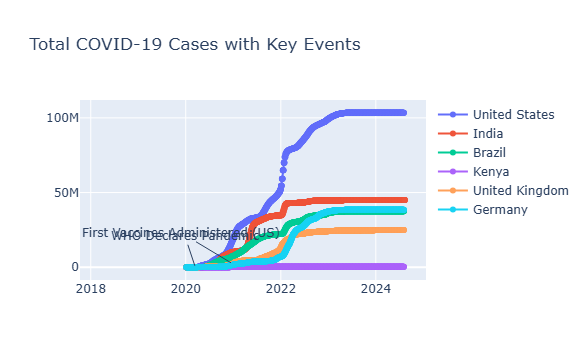

In [33]:
import plotly.graph_objects as go

fig = go.Figure()
for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['date'],
        y=country_data['total_cases'],
        name=country,
        mode='lines+markers',
        hovertemplate="<b>%{x|%b %Y}</b><br>Cases: %{y:,}"
    ))

# Add lockdown/vaccine annotations
fig.update_layout(
    title="Total COVID-19 Cases with Key Events",
    annotations=[
        dict(x='2020-03-11', y=1e6, text="WHO Declares Pandemic", showarrow=True),
        dict(x='2020-12-14', y=3e6, text="First Vaccines Administered (US)", ax=-50)
    ]
)
fig.show()

C:\Users\KAMAAA\AppData\Local\Temp\ipykernel_11148\1073197463.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



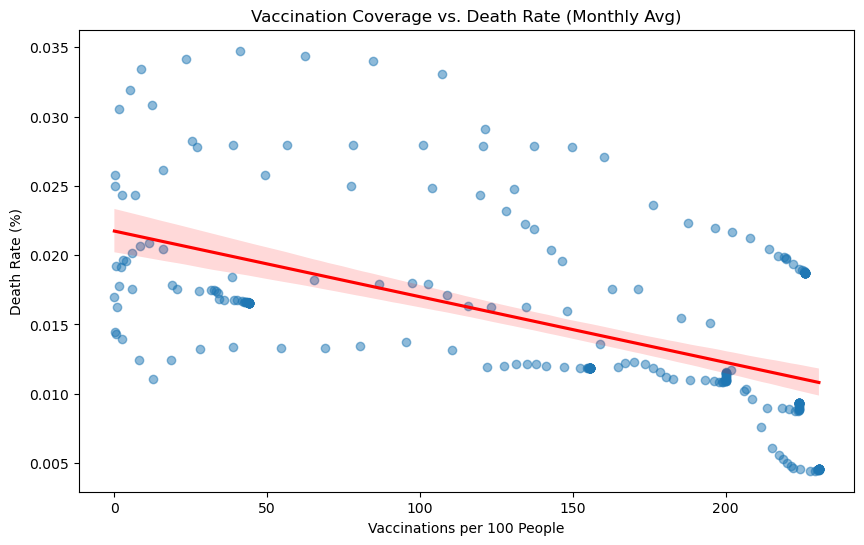

In [48]:
# Calculate monthly averages
df_monthly = df_clean.groupby(['location', pd.Grouper(key='date', freq='M')]).mean().reset_index()

# Plot vaccination vs. death rate
plt.figure(figsize=(10, 6))
sns.regplot(data=df_monthly, x='total_vaccinations_per_hundred', y='death_rate', 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Vaccination Coverage vs. Death Rate (Monthly Avg)")
plt.xlabel("Vaccinations per 100 People")
plt.ylabel("Death Rate (%)")
plt.show()

In [40]:
# Ensure we have the required columns
required_cols = ['total_vaccinations_per_hundred', 'death_rate']
if all(col in df_monthly.columns for col in required_cols):
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df_monthly, 
                x='total_vaccinations_per_hundred', 
                y='death_rate', 
                scatter_kws={'alpha':0.5}, 
                line_kws={'color':'red'})
    plt.title("Vaccination Coverage vs. Death Rate (Monthly Avg)")
    plt.xlabel("Vaccinations per 100 People")
    plt.ylabel("Death Rate (%)")
    plt.show()
else:
    print(f"Missing columns. Available: {df_monthly.columns.tolist()}")

Missing columns. Available: ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'death_rate', 'population']


In [42]:
df_monthly = df_clean.groupby(['location', pd.Grouper(key='date', freq='ME')]).mean().reset_index()

In [44]:
df_clean['total_vaccinations_per_hundred'] = (df_clean['total_vaccinations'] / df_clean['population']) * 100
df_monthly['total_vaccinations_per_hundred'] = (df_monthly['total_vaccinations'] / df_monthly['population']) * 100

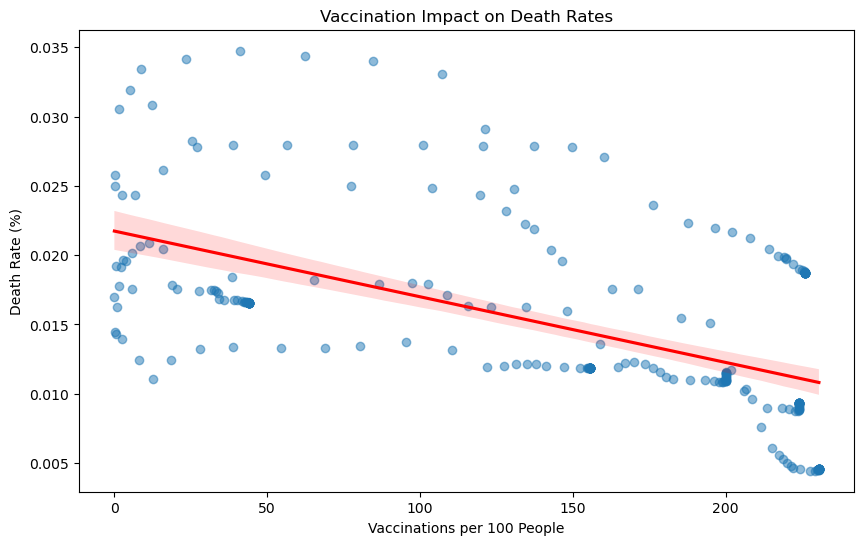

In [46]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_monthly[df_monthly['total_vaccinations_per_hundred'].notna()], 
            x='total_vaccinations_per_hundred',
            y='death_rate',
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red'})
plt.title("Vaccination Impact on Death Rates")
plt.xlabel("Vaccinations per 100 People")
plt.ylabel("Death Rate (%)")
plt.show()

In [52]:
!jupyter nbconvert --to html --no-input COVID_Analysis.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'COVID_Analysis.ipynb' matched no files


DeltaGenerator()

In [71]:
!jupyter nbconvert --to html --no-input COVID_Analysis.ipynb


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'COVID_Analysis.ipynb' matched no files


In [73]:
!jupyter nbconvert --to html --no-input COVID_Analysis.ipynb


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'COVID_Analysis.ipynb' matched no files


In [75]:

!jupyter nbconvert --to html --no-input plp_Python.ipynb


[NbConvertApp] Converting notebook plp_Python.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 729362 bytes to plp_Python.html
